## 전처리

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
import re 

In [2]:
amazon = pd.read_csv('amazon_comment_seaweed_chip_result.csv')
amazon = amazon.drop(amazon.columns[0], axis = 1)
walmart = pd.read_csv('walmart.csv') 

In [3]:
def name_cut(x):
    x = x.split('on ')[1]
    return x  

amazon["comment_date"] = amazon["comment_date"].apply(name_cut)

def name_cut(x):
    x = x.split(" out")[0]
    x = float(x)
    return x  

amazon["star_rating"] = amazon["star_rating"].apply(name_cut)

In [4]:
review = pd.concat([amazon['comment'], walmart['comment']], axis = 0) 
score = pd.concat([amazon['star_rating'], walmart['score']], axis = 0) 
author = pd.concat([amazon['comment_author'], walmart['author']], axis = 0)
date = pd.concat([amazon['comment_date'], walmart['date']], axis = 0)
title = pd.concat([amazon['comment_title'], walmart['title']], axis = 0)

review = pd.DataFrame({'date': date, 'title' : title, 'review': review, 'score': score, 'author': author})

In [5]:
stop_words = set(stopwords.words("english"))

contraction_mapping = {"won't": "will not",  "ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",

                       "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",

                       "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",

                       "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",

                       "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",

                       "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",

                       "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",

                       "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",

                       "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",

                       "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",

                       "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",

                       "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",

                       "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",

                       "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",

                       "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",

                       "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",

                       "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",

                       "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",

                       "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",

                       "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",

                       "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",

                       "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",

                       "you're": "you are", "you've": "you have"}

In [6]:
# 전처리 함수

def preprocess(text):
    values = "".join(str(i) for i in str(text))
    no_capitals = str(values).lower() #모든 값에 대해 소문자 처리
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in no_capitals.split(" ")])
    tokenized = word_tokenize(newString) #string에서 nltk 이용, 키워드단어 추출
    only_english = re.sub('[^a-zA-Z]', ' ', str(tokenized)).split() #기호, 부호 예외처리
    token = [token for token in only_english if len(token) > 1]
    no_stopwords = [t for t in token if t not in stop_words]
    
    return ", ".join(no_stopwords)

In [7]:
review['cleaned_review'] = review['review'].apply(lambda x: preprocess(x))

In [8]:
review.head()

,date,title,review,score,author,cleaned_review
0,"May 4, 2019",This is very dangerous product ! Do not buy !,"I've been buying this product for a year, I ...",1.0,Dmitry,"buying, product, year, bought, many, times, wo..."
1,"September 17, 2018",Bug eggs in package?!!,Thsee don't expire until December. I opened ...,1.0,S A,"thsee, expire, december, opened, today, found,..."
2,"December 17, 2018",#1 on my list,The photo shows the seaweed brands I've trie...,5.0,Elisa S.,"photo, shows, seaweed, brands, tried, order, p..."
3,"July 23, 2017",Oily and stale,The first time I bought these I fell in love...,1.0,Ani_Mon,"first, time, bought, fell, love, types, seawee..."
4,"February 4, 2017",The BEST seasoned seaweed makers in the WORLD,I ate the entire box in a week. This stuff i...,5.0,Rachel Humphrey,"ate, entire, box, week, stuff, delicious, enjo..."


In [9]:
data = [s.split(', ') for s in review['cleaned_review']]

In [10]:
tokenized_doc = review['cleaned_review'].apply(lambda x : x.replace(', ', ' ').split())

In [11]:
# 긍부정 매핑

df = review
X = df['cleaned_review']
y_dict = {1.0:0, 2.0:0, 3.0:1, 4.0:1, 5.0:1}
y = df['score'].map(y_dict)

df['score'] = df['score'].map(y_dict)

In [12]:
df['cleaned_review'].groupby(df['score']).get_group(0)

0       buying, product, year, bought, many, times, wo...
1       thsee, expire, december, opened, today, found,...
3       first, time, bought, fell, love, types, seawee...
5       batch, smelled, tasted, like, gasoline, bizarr...
8       okay, product, taste, fine, etc, okay, found, ...
                              ...                        
1769    definitely, like, product, sure, eat, right, w...
1770    like, much, guess, everyone, diff, opinions, s...
1771    expecting, taste, good, tasted, like, fish, fo...
1797    would, recommend, great, tasting, try, ocean, ...
1837    fan, taste, product, little, much, think, woul...
Name: cleaned_review, Length: 896, dtype: object

In [13]:
positive_doc = df['cleaned_review'].groupby(df['score']).get_group(1).apply(lambda x : x.replace(', ', ' ').split())
negative_doc = df['cleaned_review'].groupby(df['score']).get_group(0).apply(lambda x : x.replace(', ', ' ').split())

In [14]:
positive_doc

2       [photo, shows, seaweed, brands, tried, order, ...
4       [ate, entire, box, week, stuff, delicious, enj...
6       [bought, seaweed, snack, food, sushi, answer, ...
7       [someone, never, tried, seaweed, took, minute,...
9       [fan, seaweed, snacks, tried, many, package, o...
                              ...                        
1932    [love, asian, food, brand, best, easy, find, g...
1933    [purchased, chili, lime, consistency, good, ca...
1934    [tried, ocean, halo, seaweed, snack, sheets, l...
1935    [great, healthy, option, snacking, go, love, c...
1936                                          [delicious]
Name: cleaned_review, Length: 4883, dtype: object

In [15]:
# pos tagging

tagged = []

for t in tokenized_doc:
    tagged.append(nltk.pos_tag(t))

pos_tag = pd.DataFrame({'tagged': tagged })
pos_tag.head()

,tagged
0,"[(buying, VBG), (product, NN), (year, NN), (bo..."
1,"[(thsee, NN), (expire, NN), (december, NN), (o..."
2,"[(photo, NN), (shows, NNS), (seaweed, VBP), (b..."
3,"[(first, JJ), (time, NN), (bought, VBN), (fell..."
4,"[(ate, NN), (entire, JJ), (box, NN), (week, NN..."


In [16]:
# 명사만 추출

noun = []

for i in range(len(pos_tag['tagged'])):
    for (word, tag) in pos_tag['tagged'][i]:
        if tag == 'NN' or tag == 'NNS':
            noun.append(word)
noun[:10]

['product',
 'year',
 'times',
 'start',
 'today',
 'something',
 'piece',
 'thin',
 'seaweed',
 'sheet']

In [17]:
def extract_pos(tagged):
    noun = []
    for (word, tag) in tagged:
        if tag == 'NN' or tag == 'NNS':
            noun.append(word)
    return noun

pos_tag['tagged'].map(extract_pos).head()

0    [product, year, times, start, today, something...
1    [thsee, expire, december, today, bug, eggs, re...
2    [photo, shows, brands, order, preference, jayo...
3    [time, types, snacks, difference, time, time, ...
4    [ate, box, week, seaweed, folks, brands, way, ...
Name: tagged, dtype: object

In [18]:
pos_tag['noun'] = pos_tag['tagged'].map(extract_pos)
pos_tag.head()

,tagged,noun
0,"[(buying, VBG), (product, NN), (year, NN), (bo...","[product, year, times, start, today, something..."
1,"[(thsee, NN), (expire, NN), (december, NN), (o...","[thsee, expire, december, today, bug, eggs, re..."
2,"[(photo, NN), (shows, NNS), (seaweed, VBP), (b...","[photo, shows, brands, order, preference, jayo..."
3,"[(first, JJ), (time, NN), (bought, VBN), (fell...","[time, types, snacks, difference, time, time, ..."
4,"[(ate, NN), (entire, JJ), (box, NN), (week, NN...","[ate, box, week, seaweed, folks, brands, way, ..."


# Clustering

In [19]:
# 긍정
# doc2vec

import gensim

def tagged_document(list_of_list_of_words):
   for i, list_of_words in enumerate(list_of_list_of_words):
      yield gensim.models.doc2vec.TaggedDocument(list_of_words, [i])

data_for_training = list(tagged_document(positive_doc))

doc2vec = gensim.models.doc2vec.Doc2Vec(vector_size=64, min_count=2, epochs=30)
doc2vec.build_vocab(data_for_training)
doc2vec.train(data_for_training, total_examples=doc2vec.corpus_count, epochs=doc2vec.epochs)

In [20]:
# clustering

from sklearn.cluster import KMeans
from sklearn.neighbors import KDTree

# 단어벡터들을 n개의 클러스터로 군집화 해주는 함수 kmeans++을 사용
def clustering_on_wordvecs(word_vectors, num_clusters):
    # Initalize a k-means object and use it to extract centroids
    kmeans_clustering = KMeans(n_clusters = num_clusters, init='k-means++')
    idx = kmeans_clustering.fit_predict(word_vectors)
    
    return kmeans_clustering.cluster_centers_, idx

In [21]:
X = doc2vec[doc2vec.wv.vocab]

centers, clusters = clustering_on_wordvecs(X, 5)
centroid_map = dict(zip(doc2vec.wv.index2word, clusters))

In [22]:
pd.Series(clusters).value_counts()

1    2375
0     225
4     154
2     153
3     101
dtype: int64

In [23]:
 # 각 클러스터에 중심점에서 가장 유사한 벡터들(단어들) k개를 뽑는 함수
    
def get_top_words(index2word, k, centers, wordvecs):
    tree = KDTree(wordvecs);
    #Closest points for each Cluster center is used to query the closest 20 points to it.
    closest_points = [tree.query(np.reshape(x, (1, -1)), k=k) for x in centers];
    closest_words_idxs = [x[1] for x in closest_points];
    #Word Index is queried for each position in the above array, and added to a Dictionary.
    closest_words = {};
    for i in range(0, len(closest_words_idxs)):
        closest_words['Cluster #' + str(i)] = [index2word[j] for j in closest_words_idxs[i][0]]
    #A DataFrame is generated from the dictionary.
    df = pd.DataFrame(closest_words);
    df.index = df.index+1
    return df

In [24]:
top_words = get_top_words(doc2vec.wv.index2word, 50, centers, X)

In [25]:
top_words.head(25)

,Cluster #0,Cluster #1,Cluster #2,Cluster #3,Cluster #4
1,consuming,indulge,near,premium,bargain
2,toddler,burger,tupperware,bitter,morning
3,wasabe,vitamins,clean,afternoon,obsessed
4,pricing,split,cucumber,kirkland,cheapest
5,problem,sharing,fantastic,okay,telling
6,entire,throwing,expired,look,steamed
7,consider,mess,compare,blend,hoped
8,chewy,crispier,factor,provide,thick
9,budget,wellness,meat,book,upset
10,excessive,fancy,working,follow,drawer


In [26]:
# 부정

data_for_training = list(tagged_document(negative_doc))

doc2vec = gensim.models.doc2vec.Doc2Vec(vector_size=64, min_count=2, epochs=30)
doc2vec.build_vocab(data_for_training)
doc2vec.train(data_for_training, total_examples=doc2vec.corpus_count, epochs=doc2vec.epochs)

X = doc2vec[doc2vec.wv.vocab]

centers, clusters = clustering_on_wordvecs(X, 3)
centroid_map = dict(zip(doc2vec.wv.index2word, clusters))

pd.Series(clusters).value_counts()

top_words = get_top_words(doc2vec.wv.index2word, 50, centers, X)
top_words.head(25)

,Cluster #0,Cluster #1,Cluster #2
1,offered,dogs,intolerant
2,korean,costco,christmas
3,joes,thing,paying
4,dark,true,times
5,jelly,long,bug
6,kick,sesame,smelled
7,balls,saying,wanted
8,goes,makes,coupons
9,shown,fact,tolerable
10,mountain,totally,fine


# Topic modeling

In [27]:
from gensim import corpora 
from gensim import models

# 긍정

dictionary = corpora.Dictionary(positive_doc) 

corpus = [dictionary.doc2bow(text) for text in positive_doc]  # bag of words (단어가 있나 - 1, 없나 - 0)
lda = models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, # 벡터화한 단어와 단어 사전 압력
        num_topics=3, random_state = 1) 

In [28]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
pyLDAvis.display(vis)

In [29]:
word_dict = {}

for i in range(3):
    words = lda.show_topic(i, topn = 25)
    word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words]

pd.DataFrame(word_dict) 

,Topic # 01,Topic # 02,Topic # 03
0,seaweed,great,love
1,snack,flavor,snack
2,snacks,seaweed,product
3,flavor,good,good
4,would,snack,loved
5,like,snacks,great
6,try,taste,would
7,taste,love,buy
8,good,delicious,definitely
9,really,eat,seaweed


In [30]:
# 부정

dictionary = corpora.Dictionary(negative_doc) 

corpus = [dictionary.doc2bow(text) for text in negative_doc]  # bag of words (단어가 있나 - 1, 없나 - 0)
lda = models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, # 벡터화한 단어와 단어 사전 압력
        num_topics=3, random_state = 1) 

In [31]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
pyLDAvis.display(vis)

In [32]:
word_dict = {}

for i in range(3):
    words = lda.show_topic(i, topn = 25)
    word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words]

pd.DataFrame(word_dict) 

,Topic # 01,Topic # 02,Topic # 03
0,like,taste,like
1,taste,like,product
2,would,seaweed,seaweed
3,seaweed,would,taste
4,flavor,flavor,one
5,one,one,buy
6,try,box,bag
7,snacks,snack,tasted
8,product,eat,flavor
9,love,snacks,crackers


# Network modeling

In [612]:
import networkx as nx

tagged_sents = [nltk.pos_tag(sentence) for sentence in tokenized_doc]

In [613]:
import re
for token, tag in tagged_sents[0]:
    if re.match(r'NN*|JJ*', tag):
        print (token, tag)

product NN
year NN
many JJ
times NNS
start NN
today NN
something NN
sharp JJ
stack JJ
deep JJ
tongue JJ
piece NN
thin NN
inch JJ
length NN
seaweed JJ
sheet NN
fish JJ
bone NN
ut JJ
wire NN
death NN
happen JJ
thing NN
dangerous JJ
image NN
give JJ
kids NNS
dangerous JJ
product NN


In [614]:
noun_phrases = [[token for token, tag in sent if re.match(r'NN*|JJ*', tag)] 
                for sent in tagged_sents]

In [615]:
import itertools as it
edgelist = [edge for phrase in noun_phrases for edge in it.combinations(phrase, 2)]

In [616]:
G = nx.Graph(edgelist)
index = nx.betweenness_centrality(G)

sorted_index = sorted(index.items(), key=lambda x:x[1], reverse=True)

# Top 10 noun phrases by betweenness centrality:
for word, centr in sorted_index[:10]:
        print (word, centr)

taste 0.06386158539190173
snack 0.05929117673139671
flavor 0.04883720265858079
seaweed 0.04282928094228625
snacks 0.0422076130930521
product 0.03597867746612883
delicious 0.021505753661634347
eat 0.020739311398279364
little 0.01846788798825126
healthy 0.01656901289275728


In [617]:
G.size()

210961

Populating the interactive namespace from numpy and matplotlib


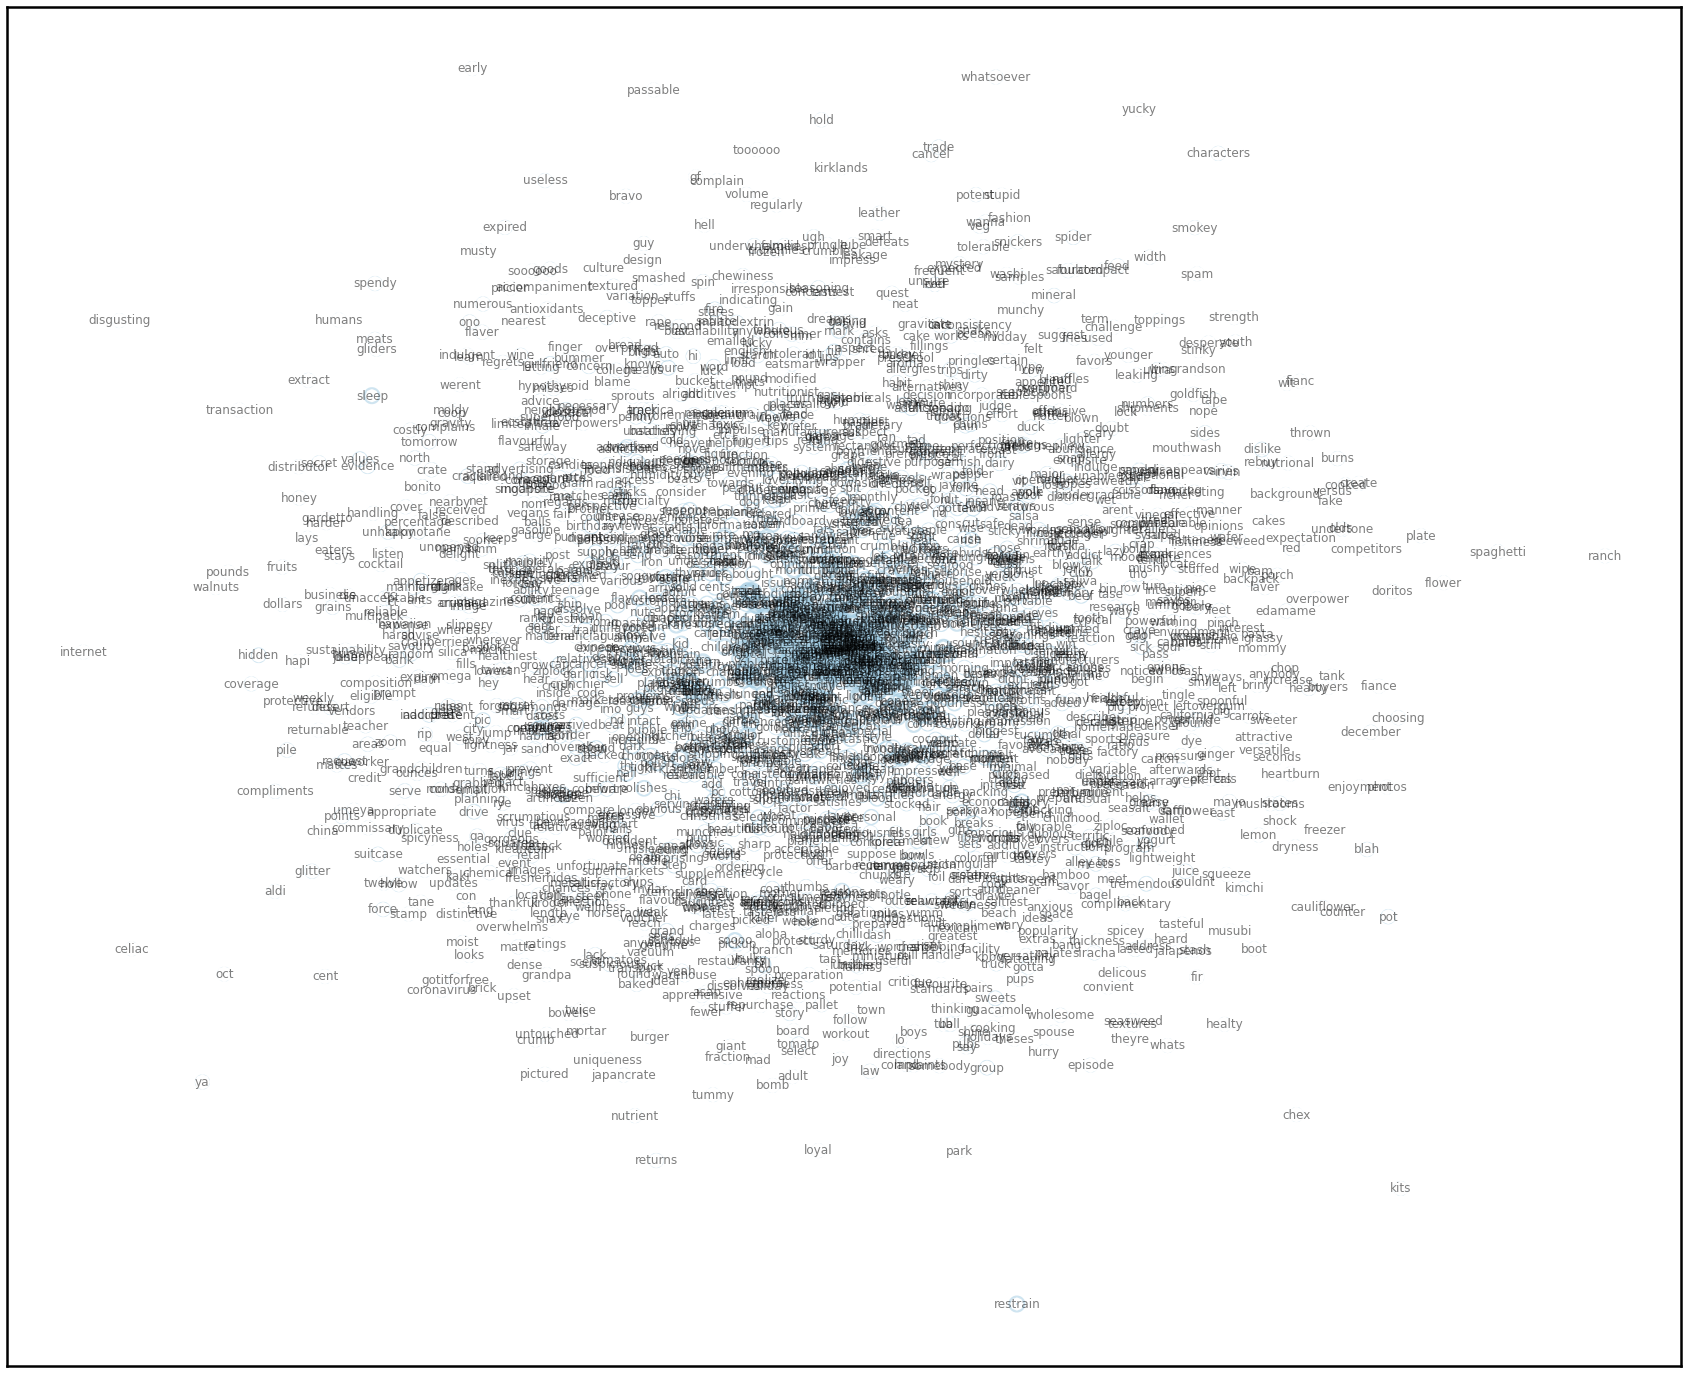

In [621]:
%pylab inline
%config InlineBackend.figure_format = 'png'
plt.rc('figure', figsize=(30, 25))
G.remove_nodes_from([n for n in index if index[n] == .0])
node_size = [index[n]*10000 for n in G]
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, node_size=node_size, node_color='#A0CBE2', edge_color='white', alpha=.5, linewidths=15)

In [35]:
# 긍정

import itertools as it

edgelist = [edge for phrase in positive_doc for edge in it.combinations(phrase, 2)]

In [ ]:
import networkx as nx

G = nx.Graph(edgelist)
index_1 = nx.betweenness_centrality(G)

sorted_index_1 = sorted(index_1.items(), key=lambda x:x[1], reverse=True)

# Top 10 noun phrases by betweenness centrality:
for word, centr in sorted_index_1[:10]:
        print (word, centr)

In [ ]:
index_2 = nx.closeness_centrality(G)

sorted_index_2 = sorted(index_2.items(), key=lambda x:x[1], reverse=True)

# Top 10 noun phrases by betweenness centrality:
for word, centr in sorted_index_2[:10]:
        print (word, centr)

In [ ]:
index_3 = nx.degree_centrality(G)

sorted_index_3 = sorted(index_3.items(), key=lambda x:x[1], reverse=True)

# Top 10 noun phrases by betweenness centrality:
for word, centr in sorted_index_3[:10]:
        print (word, centr)

In [ ]:
# 부정

edgelist = [edge for phrase in negative_doc for edge in it.combinations(phrase, 2)]
G = nx.Graph(edgelist)
index_4 = nx.betweenness_centrality(G)

sorted_index_4 = sorted(index_4.items(), key=lambda x:x[1], reverse=True)

# Top 10 noun phrases by betweenness centrality:
for word, centr in sorted_index_4[:10]:
        print (word, centr)

In [ ]:
index_5 = nx.closeness_centrality(G)

sorted_index_5 = sorted(index_5.items(), key=lambda x:x[1], reverse=True)

# Top 10 noun phrases by betweenness centrality:
for word, centr in sorted_index_5[:10]:
        print (word, centr)

In [ ]:
index_6 = nx.degree_centrality(G)

sorted_index_6 sorted(index_6.items(), key=lambda x:x[1], reverse=True)

# Top 10 noun phrases by betweenness centrality:
for word, centr in sorted_index_6[:10]:
        print (word, centr)